https://capitalbikeshare.com/system-data

# IMPORTS

In [2]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

# lecture du jeu de donnees

In [9]:
data = pd.read_csv('Capital_Bikeshare_data.csv', sep=';')

# Affichage du jeu de donnees

In [18]:
data.info()
data.head()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   dteday          731 non-null    object        
 1   season          731 non-null    int64         
 2   yr              731 non-null    int64         
 3   mnth            731 non-null    int64         
 4   holiday         731 non-null    int64         
 5   weekday         731 non-null    int64         
 6   workingday      731 non-null    int64         
 7   weathersit      731 non-null    int64         
 8   temp            731 non-null    float64       
 9   atemp           731 non-null    float64       
 10  hum             731 non-null    float64       
 11  windspeed       731 non-null    float64       
 12  casual          731 non-null    int64         
 13  registered      731 non-null    int64         
 14  cnt             731 non-null    int64         
 15  numeri

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,numeric_column,date_column
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,0.495385,2012-01-01 00:00:00
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,0.059130,2011-01-01 00:00:00
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,0.337083,2011-07-02 12:00:00
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,0.498333,2012-01-01 00:00:00
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,0.655417,2012-07-01 12:00:00
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,0.861667,2012-12-31 00:00:00
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,0.183051,NaN


# Verification de présence de valeurs manquantes

In [11]:
data.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

On contate qu'on a pas de valeurs manquantes

## Verification de presence de doublons

In [12]:
duplicates = data.duplicated()

# Vérifier si des doublons existent
if duplicates.any():
    print("Des doublons existent dans le jeu de données.")
else:
    print("Aucun doublon trouvé dans le jeu de données.")

Aucun doublon trouvé dans le jeu de données.


## Verification des erreurs de formats

In [16]:
# Vérifier les erreurs de format pour les dates
try:
    data['date_column'] = pd.to_datetime(data['dteday'], format='%d/%m/%Y')
    print("Aucune erreur de format détectée pour les dates.")
except ValueError:
    print("Des erreurs de format sont présentes dans les dates.")

# Vérifier les erreurs de format pour les nombres
try:
    data['numeric_column'] = pd.to_numeric(data['temp'])
    print("Aucune erreur de format détectée pour les nombres.")
except ValueError:
    print("Des erreurs de format sont présentes dans les nombres.")

Aucune erreur de format détectée pour les dates.
Aucune erreur de format détectée pour les nombres.


In [17]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,numeric_column,date_column
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,0.495385,2012-01-01 00:00:00
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,0.059130,2011-01-01 00:00:00
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,0.337083,2011-07-02 12:00:00
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,0.498333,2012-01-01 00:00:00
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,0.655417,2012-07-01 12:00:00
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,0.861667,2012-12-31 00:00:00
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,0.183051,NaN


<Axes: xlabel='dteday', ylabel='temp'>

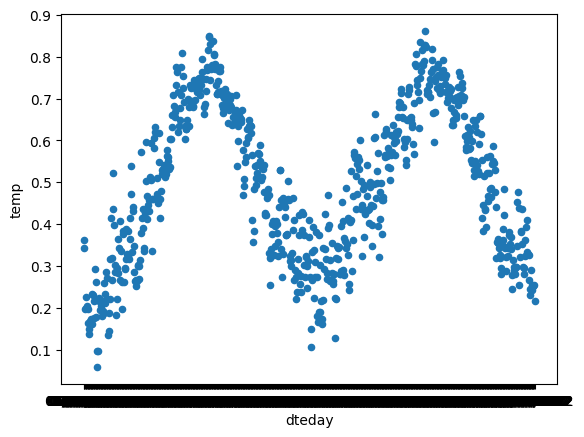

In [19]:
data.plot(x='dteday', y='temp', kind='scatter')

data.